*Python Machine Learning 2nd Edition* by [Sebastian Raschka](https://sebastianraschka.com) and Vahid Mirjalili, Packt Publishing Ltd. 2017

Code Repository: https://github.com/rasbt/python-machine-learning-book-2nd-edition

Code License: [MIT License](https://github.com/rasbt/python-machine-learning-book-2nd-edition/blob/master/LICENSE.txt)

In [1]:
%matplotlib inline

## Training neural networks efficiently with high-level TensorFlow APIs

In [2]:
import tensorflow as tf
import tensorflow.keras as keras

import numpy as np

## loading the data

(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data() #date load load_data() : 훈련데이터와 훈련데이터레이블,
 #테스트데이터와 테스트데이터레이블가져옴

## mean centering and normalization:
mean_vals = np.mean(X_train, axis=0)
std_val = np.std(X_train)

X_train_centered = (X_train - mean_vals)/std_val
X_test_centered = (X_test - mean_vals)/std_val

del X_train, X_test

print(X_train_centered.shape, y_train.shape) #6만장의 이미지 28x28

print(X_test_centered.shape, y_test.shape) 

C:\Users\samsung\anaconda3\envs\test\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\samsung\anaconda3\envs\test\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\samsung\anaconda3\envs\test\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\samsung\anaconda3\envs\test\lib\site-packages\tensorflow\pyth

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


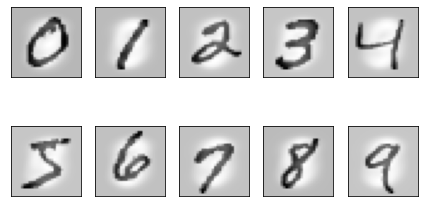

In [3]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=2, ncols=5, sharex=True, sharey=True,) #2개행 5개열의 figure생성
ax = ax.flatten()
for i in range(10): #총10개의 이미지 plot
    img = X_train_centered[y_train == i][0].reshape(28, 28) #레이블이 i인 이미지를 가져옴
    ax[i].imshow(img, cmap='Greys') #cmap > 이미지 흑백출력

ax[0].set_xticks([]) #x축 y축 숫자지정 (x)
ax[0].set_yticks([])
plt.tight_layout()

plt.show()

### Developing Multilayer Neural Networks with Keras

In [4]:
np.random.seed(123) #다음실행에도 똑같은 난수로 초기화하도록 설정
#tf.random.set_seed(123)
tf.random.set_random_seed(123)

In [5]:
y_train_onehot = keras.utils.to_categorical(y_train)
 
print('First 3 labels: ', y_train[:3]) #train데이터의 레이블 3개
print('\nFirst 3 labels (one-hot):\n', y_train_onehot[:3])

y_test_onehot = keras.utils.to_categorical(y_test)

First 3 labels:  [5 0 4]

First 3 labels (one-hot):
 [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


In [1]:
from tensorflow.keras import regularizers
drop_prob1,drop_prob2 = 0.5,0.1
model = keras.models.Sequential() #sequential > layer를 연결해서 구성할수있는 모델 객체 생성

model.add( #layer추가
    keras.layers.Flatten(input_shape=(28, 28))) #784개의 입력노드 생성 

model.add(
    keras.layers.Dense(
        units=50,    #50개의 히든레이어
        kernel_initializer='glorot_uniform', #Relu에 맞는 초기값
        kernel_regularizer=regularizers.l2(0.001),#regularization.L2 
        bias_initializer='zeros', #편향 초기값 0
        activation='relu'))#활성화 함수 RELU

model.add(
    keras.layers.Dense(
        units=50,    #50개의 히든레이어
        kernel_initializer='glorot_uniform', #Relu에 맞는 초기값
        kernel_regularizer=regularizers.l2(0.001),#regularization.L2 
        bias_initializer='zeros', #편향 초기값 0
        activation='relu'))#활성화 함수 RELU
        
#dropout  
keras.layers.Dropout(drop_prob1)

model.add(
    keras.layers.Dense(
        units=y_train_onehot.shape[1],    
        kernel_initializer='glorot_uniform',#가중치 초기값
        bias_initializer='zeros', # bias초기값
        activation='softmax')) #활성화함수 : 분류할때 사용하는 softmax

model.summary()

ModuleNotFoundError: No module named 'tensorflow'

In [23]:
sgd_optimizer = keras.optimizers.SGD( #옵티마이저 
        lr=0.001, decay=0, momentum=.9) #초기학습률 lr , mementum : 기울기 관성 ,decay : 매개변수를 업데이트할때 학습률을 감소

#running rate이 너무크면 

model.compile(optimizer= sgd_optimizer, 
              loss='categorical_crossentropy',
              metrics=['accuracy']) #모델이 평가할 측정항목

In [24]:
history = model.fit(X_train_centered, y_train_onehot, #fit : 학습진행 (입력이미지 > train이미지) input> 정규화한 데이터
                    batch_size=64, epochs=50, shuffle=0, 
                    verbose=1, #학습진행률을 보여주는 것
                    validation_split=0.1) #입력이미지중에서 얼마나 검증데이터로 사용할 것인지 비중 설정 //6만장의 데이터중 0.1만큼을 검증데이터 사용


Train on 54000 samples, validate on 6000 samples
Epoch 1/50
54000/54000 [==============================] - 6s 103us/sample - loss: 0.8416 - acc: 0.8007 - val_loss: 0.4148 - val_acc: 0.9265
Epoch 2/50
54000/54000 [==============================] - 6s 107us/sample - loss: 0.4346 - acc: 0.9164 - val_loss: 0.3425 - val_acc: 0.9447
Epoch 3/50
54000/54000 [==============================] - 5s 96us/sample - loss: 0.3705 - acc: 0.9339 - val_loss: 0.3092 - val_acc: 0.9542
Epoch 4/50
54000/54000 [==============================] - 6s 103us/sample - loss: 0.3341 - acc: 0.9438 - val_loss: 0.2882 - val_acc: 0.9580
Epoch 5/50
54000/54000 [==============================] - 5s 95us/sample - loss: 0.3091 - acc: 0.9504 - val_loss: 0.2732 - val_acc: 0.9622
Epoch 6/50
54000/54000 [==============================] - 5s 92us/sample - loss: 0.2900 - acc: 0.9555 - val_loss: 0.2616 - val_acc: 0.9647
Epoch 7/50
54000/54000 [==============================] - 5s 96us/sample - loss: 0.2746 - acc: 0.9594 - val_loss: 

In [26]:
import matplotlib.pyplot as plt #epoch이 진행됨에 따라 loss값과 accuracy값 확인

history_dict = history.history #학습진행상황을 저장 loss와 accuracy값을 저장해뒀다가 가져올수있음

loss = history_dict['loss']
val_loss = history_dict['val_loss']

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, 'b', label= 'Training loss') #epoch마다 loss와 accuracy값을 확인
plt.plot(epochs, val_loss, 'r', label='Validation loss')

plt.plot(epochs, acc, 'g', label= 'Training acc')
plt.plot(epochs, val_acc, 'c', label='Validation acc')

plt.title('Training/validation loss and accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend() #그래프 카테고리 보여줌

plt.show()

KeyError: 'accuracy'

In [ ]:
y_test_pred = model.predict_classes(X_test_centered, #출력값중 가장 큰 값의 인덱스를 사용
                                    verbose=0)
#softmax사용시 확률값을 최대값으로 도출하게됨

#예측값중 틀린값이 무엇인지 확인
miscl_img = X_test_centered[y_test != y_test_pred][:25] #y_test: 정답 이미지, y_test_pred 예측한 이미지
correct_lab = y_test[y_test != y_test_pred][:25] #잘못예측된 이미지에 대해서 원래 레이블 답을 저장해줌
miscl_lab = y_test_pred[y_test != y_test_pred][:25] #잘못예측된 25개의 이미지를 저장

fig, ax = plt.subplots(nrows=5, ncols=5, sharex=True, sharey=True,) #5개 행,열로 figure생성
ax = ax.flatten()
for i in range(25):  #25개 이미지 plot
    img = miscl_img[i].reshape(28, 28) #28 by 28로 reshape
    ax[i].imshow(img, cmap='Greys', interpolation='nearest') #interpoaltion = nearest: diplay할 이미지의 해상도가 달라도 plot
    ax[i].set_title('%d) t: %d p: %d' % (i+1, correct_lab[i], miscl_lab[i]))

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()

#잘못예측한 이미지들을 보여줌
plt.show()

In [ ]:
#test이미지에 대한 모델의 손실과 정확도 리턴
model.evaluate(X_test_centered, y_test_onehot, verbose=2) #test이미지에 대한 loss값과 accuracy값